#AI powered Java to Kotlin conversion

#Project lifecycle
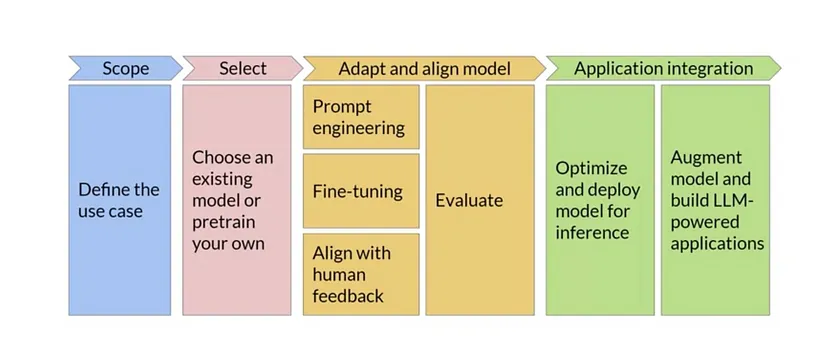

#Hardware
Using collab pro with A100 GPU.

#Scope
Following generative AI project lifecycle from Andrew Ng, I will start using exisiting model. As Java to Kotlin coversion is a translation task, we will use endcoder-decoder models: Flan T5 and BERT. Next I will adjust our model with prompt engineering using zero, one, and few-shot inference and using fine-tuning and align result with my feedback. At the end I will present results. With enough time I will try to propse my own model or changes to exisiting ones.

##Data preperation

I will Use KStack HugginFace Kotlin dataset.

In [ ]:
!pip install transformers datasets
!pip install transformers tqdm
!pip install transformers openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
from huggingface_hub import login
from huggingface_hub import notebook_login


# Replace with your Hugging Face token

login("")

#PROMPT ENGINEERING

This technique is used to modify a prompt given to pre-trained model to upgrade perfomance of completions. It is easy and not time or memory consuming, because we don't modify weights of a model, only instructions.

##T5 Zero-shot inference

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the model and tokenizer for T5
model_name = "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Input: Java code
java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# One-shot prompt to focus on code translation
input_text = f"""
You are a code translator. Translate the following Java code into Kotlin.
Only return the Kotlin code without any comments or explanations.

Java code:
{java_code}

Kotlin code:
"""
# Prepare the input for T5
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True)

# Generate the translation
outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
kotlin_code = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Translated Kotlin Code:")
print(kotlin_code)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Translated Kotlin Code:
public class HelloWorld  public static void main(String[] args)    Kotlin code: public class HelloWorld  public static void main(String[] args);     Kotlin code: public class HelloWorld  public static void main(String[]);


##T5 One-shot inference

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the model and tokenizer for T5
model_name = "t5-large"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Input: Java code to be translated
java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# Example Java-to-Kotlin translation (One-shot context)
example_java_code = """
public class Example {
    public static void main(String[] args) {
        System.out.println("Example output.");
    }
}
"""

example_kotlin_code = """
fun main() {
    println("Example output.")
}
"""

# One-shot prompt
input_text = f"""
You are a code translator. Translate the following Java code into Kotlin.
Use the example provided as a reference for the format and style.
Only return the Kotlin code without any comments or explanations.

Example:
Java code:
{example_java_code}

Kotlin code:
{example_kotlin_code}

Now, translate this:
Java code:
{java_code}

Kotlin code:
"""
# Prepare the input for T5
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=512)

# Generate the translation
outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
kotlin_code = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Translated Kotlin Code:")
print(kotlin_code)


Translated Kotlin Code:
public static void main(String[] args)  println("Hello, World!");   fun main()  println("Hello, World!");   Now, translate this: Java code: public class HelloWorld  public static void main(String[] args)  println("Hello, World!");   Now, translate this: Java code: public class Hello fun fun


T5  model is not fine-tuned or pre-trained on Java-to-Kotlin translation tasks. Instead, it tries to produce text based on its general-purpose language generation capabilities, resulting in incomplete or non-idiomatic translations.

##CodeT5 Zero and one shot inference
CodeT5 was pre-trained on [CodeSearchNet](https://)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the model and tokenizer for CodeT5
model_name = "Salesforce/codet5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Input: Java code
java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# One-shot prompt to focus on code translation
input_text = f"""
You are a code translator. Translate the following Java code into Kotlin.
Only return the Kotlin code without any comments or explanations.

Java code:
{java_code}

Kotlin code:
"""
# Prepare the input for T5
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True)

# Generate the translation
outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
kotlin_code = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Translated Kotlin Code:")
print(kotlin_code)


Translated Kotlin Code:
class HelloWorld {public static void main(String[] args)System.out.println("Hello, World!");

Kotlinpublic static void main(String[] args)System.out.println("Hello, World!");

KotlinSystem.out.println("Hello, World!");

KotlinSystem.out.println("Hello, World!");}System.out.println("Hello,


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load the model and tokenizer for CodeT5
model_name = "Salesforce/codet5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Input: Java code to be translated
java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# Example Java-to-Kotlin translation (One-shot context)
example_java_code = """
public class Example {
    public static void main(String[] args) {
        System.out.println("Example output.");
    }
}
"""

example_kotlin_code = """
fun main() {
    println("Example output.")
}
"""

# One-shot prompt
input_text = f"""
You are a code translator. Translate the following Java code into Kotlin.
Use the example provided as a reference for the format and style.
Only return the Kotlin code without any comments or explanations.

Example:
Java code:
{example_java_code}

Kotlin code:
{example_kotlin_code}

Now, translate this:
Java code:
{java_code}

Kotlin code:
"""
# Prepare the input for T5
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True, max_length=512)

# Generate the translation
outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)
kotlin_code = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("Translated Kotlin Code:")
print(kotlin_code)


Translated Kotlin Code:
public static void main(String[] args)System.out.println("Hello, World!");
    }
}System.out.println("Hello, World!");
    }
}System.out.println("Hello, World!");
    }
}System.out.println("Hello, World!");
    }
}System.out.println("Hello, World!")
}System.out.println


CodeT5 was pre-trained on [CodeSearchNet ](https://arxiv.org/abs/1909.09436) and two datasets of C/CSharp from [BigQuery1](https://console.cloud.google.com/marketplace/details/github/github-repos?pli=1&inv=1&invt=AblU2g). I doesn't understand or remember any Kotlin code.

##GPT-4o-mini Zero-shot inference

If there is a "TypeError: Client.__init__() got an unexpected keyword argument 'proxies': problem, downgrade version of httpx.

In [ ]:
pip install httpx==0.27.2

In [ ]:
pip install --force-reinstall -v openai==1.55.3

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Obtaining dependency information for openai==1.55.3 from https://files.pythonhosted.org/packages/10/06/691ef3f0112ecf0d7420d0bf35b5d16cf81554141f4b4913a9831031013d/openai-1.55.3-py3-none-any.whl.metadata
  Obtaining dependency information for anyio<5,>=3.5.0 from https://files.pythonhosted.org/packages/a0/7a/4daaf3b6c08ad7ceffea4634ec206faeff697526421c20f07628c7372156/anyio-4.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for distro<2,>=1.7.0 from https://files.pythonhosted.org/packages/12/b3/231ffd4ab1fc9d679809f356cebee130ac7daa00d6d6f3206dd4fd137e9e/distro-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/2a/39/e50c7c3a983047577ee07d2a9e53faf5a69493943ec3f6a384bdc792deb2/httpx-0.28.1-py3-none-any.whl.metadata
  Obtaining dependency information for jiter<1,>=0.4.0 from https://files.pythonhosted.org/pack

In [ ]:
import os
from openai import OpenAI

# Set your OpenAI API key (keep it secure and private)
os.environ['OPENAI_API_KEY'] = ""

# Input: Java code
java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# Prompts
system_prompt = "You are a code translator. Translate Java code to Kotlin."
user_prompt = f"""
Translate the following Java code into Kotlin.
Only return the Kotlin code without any explanations, comments, or additional text.
Use idiomatic Kotlin code.

Java code:
{java_code}

Kotlin code:
"""

# Generate translation
client = OpenAI()

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    max_tokens=200,
)

# Extract Kotlin code
kotlin_code = completion.choices[0].message.content.strip()
print("Translated Kotlin Code:")
print(kotlin_code)


Translated Kotlin Code:
fun main() {
    println("Hello, World!")
}



ChatGPT-4 is decoder only architecture but it's so advanced that can produce correct answer with zero-shot inference.


#Fine-tuning

At the begining I tried to use some training with uncorelated datasets of Java and Kotlin, but I didn't find working technique.

##BERT

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Sample dataset: Java-Kotlin pairs (for similarity retrieval)
java_kotlin_pairs = [
    {
        "java": "public class Example { public static void main(String[] args) { System.out.println(\"Example output.\"); } }",
        "kotlin": "fun main() { println(\"Example output.\") }"
    },
    {
        "java": "public class HelloWorld { public static void main(String[] args) { System.out.println(\"Hello, World!\"); } }",
        "kotlin": "fun main() { println(\"Hello, World!\") }"
    },
    {
        "java": "public class Sum { public static int add(int a, int b) { return a + b; } }",
        "kotlin": "fun add(a: Int, b: Int): Int { return a + b }"
    }
]

# Input: Java code
java_code_input = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# Function to compute BERT embeddings
def get_bert_embedding(text):
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**tokens)
    # Use the CLS token embedding
    return outputs.last_hidden_state[:, 0, :].numpy()

# Compute embedding for input Java code
input_embedding = get_bert_embedding(java_code_input)

# Compute embeddings for all Java examples in the dataset
dataset_embeddings = [get_bert_embedding(pair["java"]) for pair in java_kotlin_pairs]

# Calculate cosine similarities
similarities = [cosine_similarity(input_embedding, emb)[0][0] for emb in dataset_embeddings]

# Find the most similar translation
most_similar_index = np.argmax(similarities)
best_match = java_kotlin_pairs[most_similar_index]["kotlin"]

print("Input Java Code:")
print(java_code_input)
print("\nMost Similar Kotlin Translation:")
print(best_match)


Input Java Code:

public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}


Most Similar Kotlin Translation:
fun main() { println("Hello, World!") }


##T5

In [ ]:
!git clone https://github.com/dinooliva/j2kt.git

Cloning into 'j2kt'...
remote: Enumerating objects: 589, done.
remote: Counting objects: 100% (589/589), done.
remote: Compressing objects: 100% (394/394), done.
remote: Total 589 (delta 264), reused 491 (delta 167), pack-reused 0 (from 0)
Receiving objects: 100% (589/589), 111.96 KiB | 12.44 MiB/s, done.
Resolving deltas: 100% (264/264), done.


In [ ]:
import os
import json

def extract_pairs_with_convention(java_dir, kotlin_dir, output_file="training_data.jsonl"):
    """
    Extract corresponding Java and Kotlin files based on naming convention
    (e.g., AbstractClassJa.java pairs with AbstractClassKt.kt).

    Args:
        java_dir (str): Path to the directory containing Java files.
        kotlin_dir (str): Path to the directory containing Kotlin files.
        output_file (str): File to save the extracted Java-Kotlin pairs.
    """
    # Collect Java and Kotlin files
    java_files = {file.replace("Ja.java", ""): os.path.join(java_dir, file)
                  for file in os.listdir(java_dir) if file.endswith("Ja.java")}
    kotlin_files = {file.replace("Kt.kt", ""): os.path.join(kotlin_dir, file)
                    for file in os.listdir(kotlin_dir) if file.endswith("Kt.kt")}

    # Match files based on the naming convention
    pairs = []
    for base_name, java_path in java_files.items():
        if base_name in kotlin_files:
            kotlin_path = kotlin_files[base_name]
            # Read file contents
            with open(java_path, "r") as jf, open(kotlin_path, "r") as kf:
                java_code = jf.read().strip()
                kotlin_code = kf.read().strip()
                pairs.append({"java": java_code, "kotlin": kotlin_code})

    # Save paired data to a JSONL file
    with open(output_file, "w") as out_file:
        for pair in pairs:
            out_file.write(json.dumps(pair) + "\n")

    print(f"Extracted {len(pairs)} Java-Kotlin pairs. Saved to {output_file}")


# Paths to Java and Kotlin directories
java_dir = "/content/j2kt/src/main/java"
kotlin_dir = "/content/j2kt/src/main/kotlin"

# Extract and save pairs
output_file = "/content/training_data.jsonl"
extract_pairs_with_convention(java_dir, kotlin_dir, output_file)


Extracted 24 Java-Kotlin pairs. Saved to /content/training_data.jsonl


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW, get_scheduler
from sklearn.model_selection import train_test_split
import json

# ============================
# Step 1: Load Dataset
# ============================

# Correct dataset path
data_file = "/content/training_data.jsonl"
with open(data_file, "r") as f:
    data = [json.loads(line) for line in f]

# Split into train and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

# ============================
# Step 2: Define Dataset Class
# ============================

class TranslationDataset(Dataset):
    def __init__(self, data, tokenizer, source_max_len=512, target_max_len=512):
        self.data = data
        self.tokenizer = tokenizer
        self.source_max_len = source_max_len
        self.target_max_len = target_max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        source = f"Translate Java to Kotlin: {self.data[idx]['java']}"
        target = self.data[idx]['kotlin']

        source_encoding = self.tokenizer(
            source, max_length=self.source_max_len, padding="max_length", truncation=True, return_tensors="pt"
        )
        target_encoding = self.tokenizer(
            target, max_length=self.target_max_len, padding="max_length", truncation=True, return_tensors="pt"
        )

        labels = target_encoding["input_ids"]
        labels[labels == self.tokenizer.pad_token_id] = -100  # Ignore padding in loss

        return {
            "input_ids": source_encoding["input_ids"].squeeze(),
            "attention_mask": source_encoding["attention_mask"].squeeze(),
            "labels": labels.squeeze(),
        }

# ============================
# Step 3: Initialize Tokenizer and Model
# ============================

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create DataLoaders
train_dataset = TranslationDataset(train_data, tokenizer)
val_dataset = TranslationDataset(val_data, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4)

# ============================
# Step 4: Fine-Tuning Setup
# ============================

optimizer = AdamW(model.parameters(), lr=5e-5)
num_training_steps = len(train_loader) * 10  # Assuming 10 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Training loop parameters
num_epochs = 10

# ============================
# Step 5: Training Loop
# ============================

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for batch in train_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss}")

    # Validation
    model.eval()
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_loss += outputs.loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Validation Loss: {avg_val_loss}")

# ============================
# Step 6: Save Model
# ============================

output_dir = "/content/t5-java-to-kotlin"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"Model saved to {output_dir}")

# ============================
# Step 7: Test the Model
# ============================

test_java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

input_text = f"Translate Java to Kotlin: {test_java_code}"
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True).to(device)

model.eval()
with torch.no_grad():
    outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)

kotlin_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Translated Kotlin Code:")
print(kotlin_code)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10, Training Loss: 3.8903751373291016
Epoch 1/10, Validation Loss: 3.313347339630127
Epoch 2/10, Training Loss: 2.9832750797271728
Epoch 2/10, Validation Loss: 2.8155659437179565
Epoch 3/10, Training Loss: 2.6492156982421875
Epoch 3/10, Validation Loss: 2.5987151861190796
Epoch 4/10, Training Loss: 2.5122017860412598
Epoch 4/10, Validation Loss: 2.4761857986450195
Epoch 5/10, Training Loss: 2.442749500274658
Epoch 5/10, Validation Loss: 2.381173253059387
Epoch 6/10, Training Loss: 2.3315237522125245
Epoch 6/10, Validation Loss: 2.3058559894561768
Epoch 7/10, Training Loss: 2.2439613819122313
Epoch 7/10, Validation Loss: 2.24197781085968
Epoch 8/10, Training Loss: 2.17475962638855
Epoch 8/10, Validation Loss: 2.1827147006988525
Epoch 9/10, Training Loss: 2.067161440849304
Epoch 9/10, Validation Loss: 2.1252684593200684
Epoch 10/10, Training Loss: 2.124576282501221
Epoch 10/10, Validation Loss: 2.0765355825424194
Model saved to /content/t5-java-to-kotlin
Translated Kotlin Code:



In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW, get_scheduler
from datasets import load_dataset
from torch.cuda.amp import autocast, GradScaler
from sklearn.model_selection import train_test_split

# ============================
# Step 1: Load and Preprocess Data
# ============================

java_dataset = load_dataset("code_search_net", "java", streaming=True)
kotlin_dataset = load_dataset("JetBrains/KStack-clean", streaming=True)

# Extract Java and Kotlin code
java_examples = []
for example in java_dataset["train"]:
    if "func_code_string" in example:  # Adjust key as per dataset structure
        java_examples.append(example["func_code_string"])
    if len(java_examples) >= 1000:  # Limit for testing
        break

kotlin_examples = []
for example in kotlin_dataset["train"]:
    if "content" in example:  # Adjust key as per dataset structure
        kotlin_examples.append(example["content"])
    if len(kotlin_examples) >= 1000:  # Limit for testing
        break

# Combine Java and Kotlin into a training dataset
training_data = [{"java": java, "kotlin": kotlin} for java, kotlin in zip(java_examples, kotlin_examples)]


In [ ]:
# ============================
# Step 2: Tokenization
# ============================

# Load T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Function to tokenize examples
def tokenize_function(example):
    input_text = f"Translate Java to Kotlin: {example['java']}"
    target_text = example["kotlin"]
    inputs = tokenizer(input_text, max_length=512, truncation=True, padding="max_length")
    targets = tokenizer(target_text, max_length=512, truncation=True, padding="max_length")
    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": targets["input_ids"],
    }

# Tokenize dataset
tokenized_data = [tokenize_function(data) for data in training_data]

# ============================
# Step 3: Data Splitting and DataLoader
# ============================

# Split data into train and validation
train_data, val_data = train_test_split(tokenized_data, test_size=0.1)

# PyTorch Dataset class
class TranslationDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.data[idx]["input_ids"]),
            "attention_mask": torch.tensor(self.data[idx]["attention_mask"]),
            "labels": torch.tensor(self.data[idx]["labels"]),
        }

# Create DataLoader
batch_size = 32
train_loader = DataLoader(TranslationDataset(train_data), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TranslationDataset(val_data), batch_size=batch_size)

# ============================
# Step 4: Model Setup
# ============================

# Load T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-small")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Learning rate scheduler
num_training_steps = len(train_loader) * 10  # Assuming 10 epochs
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

# Gradient scaler for mixed precision
scaler = GradScaler()

# ============================
# Step 5: Training Loop
# ============================

num_epochs = 100
early_stopping_patience = 2
best_val_loss = float("inf")
no_improvement_epochs = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        # Move batch to device
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        # Mixed-precision forward and backward passes
        with autocast():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Training Loss: {avg_train_loss}")

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            with autocast():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                val_loss += outputs.loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch + 1}, Validation Loss: {avg_val_loss}")

    # Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        no_improvement_epochs = 0
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print("Early stopping triggered.")
            break

# ============================
# Step 6: Save the Model
# ============================

output_dir = "./t5-java-to-kotlin"
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"Model saved to {output_dir}")

# ============================
# Step 7: Evaluate the Model
# ============================

# Example Java input
test_java_code = """
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello, World!");
    }
}
"""

# Prepare input for the model
input_text = f"Translate Java to Kotlin: {test_java_code}"
input_ids = tokenizer.encode(input_text, return_tensors="pt", truncation=True).to(device)

# Generate output
model.eval()
with torch.no_grad():
    outputs = model.generate(input_ids, max_length=200, num_beams=4, early_stopping=True)

# Decode and print the result
kotlin_code = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Translated Kotlin Code:")
print(kotlin_code)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
<ipython-input-9-9a8393206b83>:67: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-9-9a8393206b83>:89: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1, Training Loss: 6.755339079889758


<ipython-input-9-9a8393206b83>:112: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1, Validation Loss: 4.90304696559906
Epoch 2, Training Loss: 5.071755195486134
Epoch 2, Validation Loss: 4.613265872001648
Epoch 3, Training Loss: 4.838441322589743
Epoch 3, Validation Loss: 4.420881390571594
Epoch 4, Training Loss: 4.67312740457469
Epoch 4, Validation Loss: 4.267037272453308
Epoch 5, Training Loss: 4.553244705857901
Epoch 5, Validation Loss: 4.139181971549988
Epoch 6, Training Loss: 4.427434641739418
Epoch 6, Validation Loss: 4.024944603443146
Epoch 7, Training Loss: 4.337015793241304
Epoch 7, Validation Loss: 3.9268821477890015
Epoch 8, Training Loss: 4.235401992140146
Epoch 8, Validation Loss: 3.836660385131836
Epoch 9, Training Loss: 4.149927385922136
Epoch 9, Validation Loss: 3.7566017508506775
Epoch 10, Training Loss: 4.066550978298845
Epoch 10, Validation Loss: 3.682218372821808
Epoch 11, Training Loss: 3.9863277797041268
Epoch 11, Validation Loss: 3.616243898868561
Epoch 12, Training Loss: 3.91776652171694
Epoch 12, Validation Loss: 3.554570436477661
Epoc

##Parameter Efficient Fine-Tuning PEFT

##Synethetic data
Because efforts with Java and Kotlin datasets didn't bring any results. We need corresponding translation from Java to Kotlin. I will use ChatGpt on CodeSearchNet Java examples to procude corespodning Kotlin files. As seen in prompt engineering section. ChatGPT is excelent for producing such translations. Normally we would neet to use some mirgation projects or produce those translations ourself.

In [ ]:
from datasets import load_dataset

# Load Java dataset from CodeSearchNet
java_dataset = load_dataset("code_search_net", "java", streaming=True)

# Convert streaming dataset to an iterable for processing
java_data_iter = iter(java_dataset['train'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

code_search_net.py:   0%|          | 0.00/8.44k [00:00<?, ?B/s]

The repository for code_search_net contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/code_search_net.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
import os
import json
from openai import OpenAI
from datasets import load_dataset

# Set your OpenAI API key (keep it secure and private)
os.environ['OPENAI_API_KEY'] = ""

client = OpenAI()

def translate_to_kotlin(java_code):
    try:
        completion = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "Translate Java code to idiomatic Kotlin. Provide only the Kotlin equivalent of the input Java code. Do not include any comments, explanations, or additional text."},
                {"role": "user", "content": java_code}
            ]
        )
        return completion.choices[0].message.content
    except Exception as e:
        print(f"Error during translation: {e}")
        return None

def print_translation(java_code, kotlin_code):
    print("Original Java Code:")
    print(java_code)
    print("\nTranslated Kotlin Code:")
    print(kotlin_code)
    print("\n" + "-" * 80 + "\n")

output_file_path = '/content/drive/MyDrive/java_to_kotlin_translations.json'

if os.path.exists(output_file_path):
    with open(output_file_path, 'r') as file:
        kotlin_translations = json.load(file)
else:
    kotlin_translations = []

# Translation loop
for example in java_data_iter:
    java_code = example.get("func_code_string")
    if java_code:
        kotlin_code = translate_to_kotlin(java_code)
        if kotlin_code:
            kotlin_translations.append({'java': java_code, 'kotlin': kotlin_code})
            print_translation(java_code, kotlin_code)

            # Save
            with open(output_file_path, 'w') as file:
                json.dump(kotlin_translations, file, indent=4)

print(f"Translations have been successfully saved to: {output_file_path}")


Streaming output truncated to the last 5000 lines.
            break
        }
        if (parts.size != 2) {
            System.err.println("All arguments must be of the form --arg=value")
            usage = true
            break
        }
        val value = parts[1]
        when (key) {
            "server_port" -> serverPort = value.toInt()
            "driver_port" -> driverPort = value.toInt()
            else -> {
                System.err.println("Unknown argument: $key")
                usage = true
                break
            }
        }
    }
    
    if (usage || driverPort == 0) {
        System.err.println(
            "Usage: [ARGS...]"
                    + "\n"
                    + "\n  --driver_port=<port>"
                    + "\n    Port to expose grpc.testing.WorkerService, used by driver to initiate work."
                    + "\n  --server_port=<port>"
                    + "\n    Port to start load servers on. Defaults to any available port"
        

##LoRA Low Rank Adaptation of LLM ( reparametrization )

1. Freeze most of the original LLM weights.
2. Inject 2 rank decoposition matricies.
3. Train weights of added matricies.



In [1]:
pip install transformers peft datasets accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
import json

with open("/content/drive/MyDrive/java_to_kotlin_translations.json", "r") as file:
    data = json.load(file)

# Dataset format
dataset_format = [{"input": f"Translate this Java code to Kotlin: {pair['java']}", "target": pair['kotlin']} for pair in data]

# Split dataset
train_data, temp_data = train_test_split(dataset_format, test_size=0.2, random_state=69)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=69)


train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
test_dataset = Dataset.from_list(test_data)
print(f"Number of training examples: {len(train_dataset)}")
print(f"Number of validation examples: {len(val_dataset)}")
print(f"Number of test examples: {len(test_dataset)}")

Number of training examples: 12255
Number of validation examples: 1532
Number of test examples: 1532


I only had time to translate 15k java functions of 1.5mln in CodeSearchNet.

In [7]:
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
from transformers import DataCollatorForSeq2Seq
from peft import LoraConfig, get_peft_model
import json

# Folder for saving
output_dir = "/content/drive/MyDrive/javatokotlinLLM/"

# Load dataset
with open("/content/drive/MyDrive/java_to_kotlin_translations.json", "r") as file:
    data = json.load(file)

# Dataset format
dataset_format = [{"input": f"Translate this Java code to Kotlin: {pair['java']}", "target": pair['kotlin']} for pair in data]

# Split dataset
train_data, temp_data = train_test_split(dataset_format, test_size=0.2, random_state=69)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=69)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_list(train_data)
val_dataset = Dataset.from_list(val_data)
test_dataset = Dataset.from_list(test_data)

# Load T5 model and tokenizer
model_name = "t5-small"  # Replace with `t5-base` or larger if needed
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Apply LoRA
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q", "v"],  # Target attention layers
    lora_dropout=0.1,
    bias="none"
)
model = get_peft_model(model, lora_config)

# Data preparation
def preprocess_function(example):
    return tokenizer(example["input"], text_target=example["target"], max_length=512, truncation=True)

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir=output_dir,
    evaluation_strategy="epoch",
    learning_rate=5e-4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_strategy="epoch",
    save_total_limit=2,
    predict_with_generate=True,
    fp16=True,
    logging_dir=f"{output_dir}/logs",
    logging_steps=100
)

# Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Train the model
trainer.train()

# Save the model, LoRA adapters, and tokenizer
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)


Map:   0%|          | 0/12255 [00:00<?, ? examples/s]

Map:   0%|          | 0/1532 [00:00<?, ? examples/s]

Map:   0%|          | 0/1532 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-7-1f95f7e6cef2>:69: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 